# **subject**:  MLP Neural Network impelementation using trignometric activation functions

8 different cases have been examined in this notebook.

good luck - Ali

### Winter 2024



# **Case 1**: sinus without the phase & frequency:

## * **Activation function:**

$f(net) = sin(net)$

## * **feed forward equations:**
$input = X$

$net^{1} = w^{1}*X + b^{1}$

$ o^{1} = f(net^{1})$

$ net^{2} = w^{2}*o^{1} + b^{2}$

$ o^{2} = f(net^{2})$

## * **Back propagation equations:**

$W2(k+1) = W2(k) - \eta * \frac{\partial E}{\partial w^{2}}$

$W1(k+1) = W1(k) - \eta * \frac{\partial E}{\partial w^{1}}$

$b2(k+1) = b2(k) - \eta * \frac{\partial E}{\partial b^{2}}$

$b1(k+1) = b1(k) - \eta * \frac{\partial E}{\partial b^{1}}$


## * **Gradient descent equations:**

$\frac{\partial E}{\partial w^{2}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial w^{2}}$

$\frac{\partial E}{\partial b^{2}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial b^{2}}$

$\frac{\partial E}{\partial w^{1}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}} * \frac{\partial o^{1}}{\partial net^{1}} * \frac{\partial net^{1}}{\partial w^{1}}$

$\frac{\partial E}{\partial b^{1}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}} * \frac{\partial o^{1}}{\partial net^{1}} * \frac{\partial net^{1}}{\partial b^{1}}$


Training Progress: 100%|██████████| 100/100 [00:25<00:00,  3.91epoch/s]


Epoch 100: Train MSE = 4.461408994140437e-05, Test MSE = 0.00027530408210494825


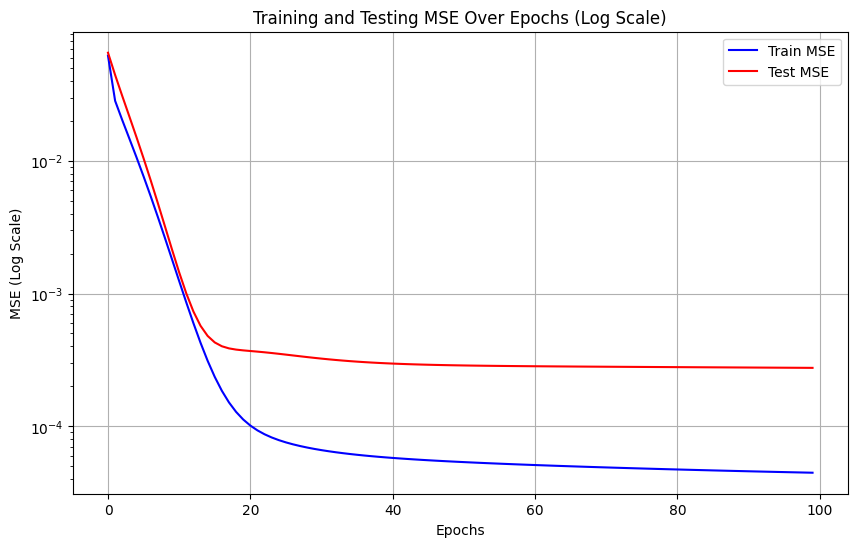

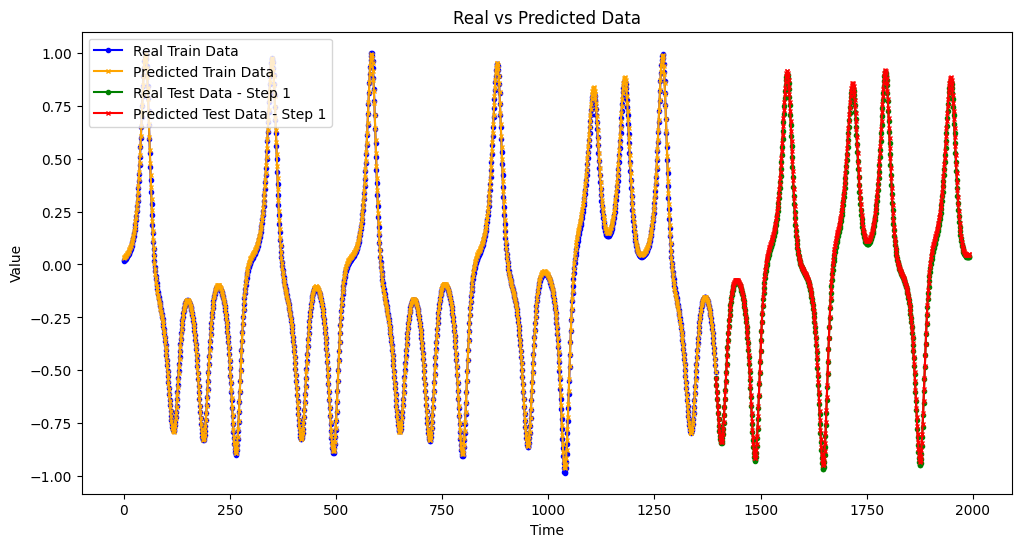

In [19]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Load data function
def LoadData(path):
    data = pd.read_excel(path, header=None).to_numpy()
    return data

# Normalize data
def normalizeData(data):
    for ii in range(8):
        data[:, ii] = data[:, ii] / np.max(data[:, ii])
    return data

def createTimeSeries(data):
    time_series_array = np.zeros((data.shape[0] - 7, 8))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
        time_series_array[i, 0] = data[i]
        time_series_array[i, 1] = data[i + 1]
        time_series_array[i, 2] = data[i + 2]
        time_series_array[i, 3] = data[i + 3]
        time_series_array[i, 4] = data[i + 4]
        time_series_array[i, 5] = data[i + 5]
        time_series_array[i, 6] = data[i + 6]
        time_series_array[i, 7] = data[i + 7]

    return  time_series_array

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.01, epochs=100):
        self.input_neurons = input_neurons # n0
        self.hidden_neurons = hidden_neurons # n1
        self.output_neurons = output_neurons # n2
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights
        np.random.seed(40)
        self.w1 = np.random.uniform(-1, 1, (input_neurons, hidden_neurons)) # n0 * n1
        self.w2 = np.random.uniform(-1, 1, (hidden_neurons, output_neurons)) # n1 * n2

        # Initialize biases
        self.b1 = np.random.uniform(-1, 1, (1, hidden_neurons)) # n1
        self.b2 = np.random.uniform(-1, 1, (1, output_neurons)) # n2

        self.train_mse = []
        self.test_mse = []

    def f(self, x):
        return np.sin(x)

    def dfnet(self, x):
        return np.cos(x)

    def pureline(self, x):
        return x;

    def pureline_derivative(self,x):
        return np.ones_like(x)

    def feedforward(self, input_data):

        self.x = input_data

        # Hidden layer calculations (including bias)
        self.net1 = np.dot(self.x, self.w1) + self.b1
        self.o1 = self.f(self.net1)

        # Output layer calculations (including bias)
        self.net2 = np.dot(self.o1, self.w2) + self.b2
        self.o2 = self.pureline(self.net2) # Linear activation for regression
        return self.o2

    def backpropagation(self, x, y_true):
        # Calculate errors
        self.error = y_true - self.o2

        # Update weights and biases
        self.w2 -= self.learning_rate * -1 * (self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.o1).T # n1 * n2
        self.b2 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) # n2

        self.w1 -= self.learning_rate * -1 * ((self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dfnet(self.net1))).T @ self.x).T # n0 * n1
        self.b1 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dfnet(self.net1)) # Update hidden bias

        return np.mean(self.error ** 2)

    def train(self, X_train, y_train, X_test, y_test):

      with tqdm(total=self.epochs, desc="Training Progress", unit="epoch") as pbar: # Progress bar - not related to Neural Network

        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X_train)):
                self.feedforward(X_train[i:i+1])
                total_error += self.backpropagation(X_train[i:i+1],y_train[i:i+1])

            train_mse = total_error / len(X_train)
            self.train_mse.append(train_mse)

            # Calculate test MSE at the end of each epoch
            test_predictions = self.predict(X_test)
            test_mse = np.mean((y_test.flatten() - np.array(test_predictions)) ** 2)
            self.test_mse.append(test_mse)

            pbar.update(1)            # Update the progress bar
        print(f"Epoch {epoch+1}: Train MSE = {train_mse}, Test MSE = {test_mse}")

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            predictions.append(self.feedforward(X[i:i+1])[0, 0])
        return predictions

# import data

file_path = 'Lorenz Dataset.xlsx'
data = LoadData(file_path)
data = createTimeSeries(data)
data = normalizeData(data)

num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

X_train, X_test = data[:num_train, :5] , data[num_train:, :5]
Y_train, Y_test = data[:num_train, -1] , data[num_train:, -1]

# Initialize and train the neural network

learning_rate = 0.005
epochs = 100
hidden_neurons = 10
input_neurons = X_train.shape[1]
output_neurons = 1


nn = NeuralNetwork(input_neurons, hidden_neurons, output_neurons, learning_rate, epochs)
nn.train(X_train, Y_train, X_test, Y_test)


# Plot the MSE values after training
# Plot the MSE values after training with log scale on y-axis
plt.figure(figsize=(10, 6))
plt.plot(range(nn.epochs), nn.train_mse, label='Train MSE', color='blue')
plt.plot(range(nn.epochs), nn.test_mse, label='Test MSE', color='red')
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.xlabel('Epochs')
plt.ylabel('MSE (Log Scale)')
plt.title('Training and Testing MSE Over Epochs (Log Scale)')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


# Predict and plot real vs. predicted values for training and testing data
train_predictions = nn.predict(X_train)
test_predictions = nn.predict(X_test)

# Plot real vs predicted values (no denormalization needed)
plt.figure(figsize=(12, 6))
plt.plot(range(len(Y_train)), Y_train, label='Real Train Data', color='blue', marker='o', markersize=3)
plt.plot(range(len(train_predictions)), train_predictions, label='Predicted Train Data', color='orange', marker='x', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), Y_test, label='Real Test Data - Step 1', color='green', marker='o', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), np.array(test_predictions), label='Predicted Test Data - Step 1', color='red', marker='x', markersize=3)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Real vs Predicted Data')
plt.show()

# **Case 2**: Cosinus without phase & frequency:

## * **Activation function:**

$f(net) = cos(net)$


### -Neural Network equations are same as case 1


Training Progress: 100%|██████████| 50/50 [00:13<00:00,  3.83epoch/s]


Epoch 50: Train MSE = 5.006220587633749e-05, Test MSE = 6.977864107905107e-05


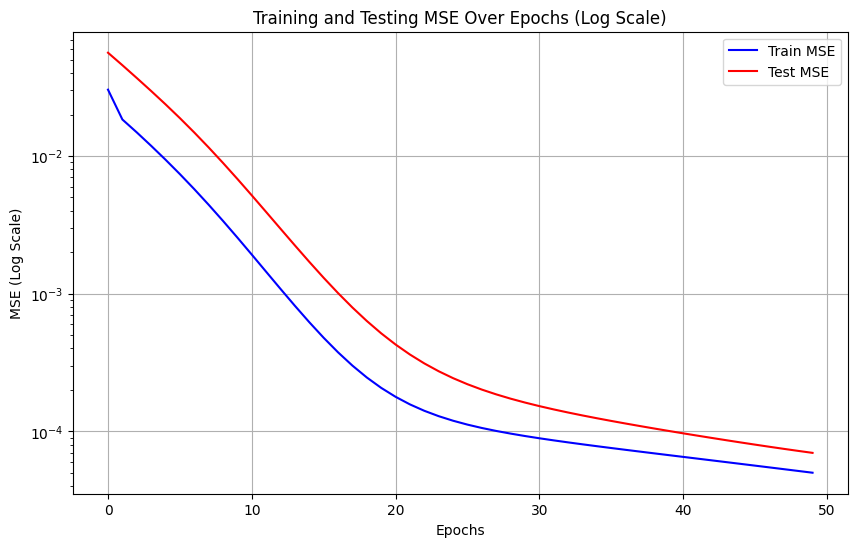

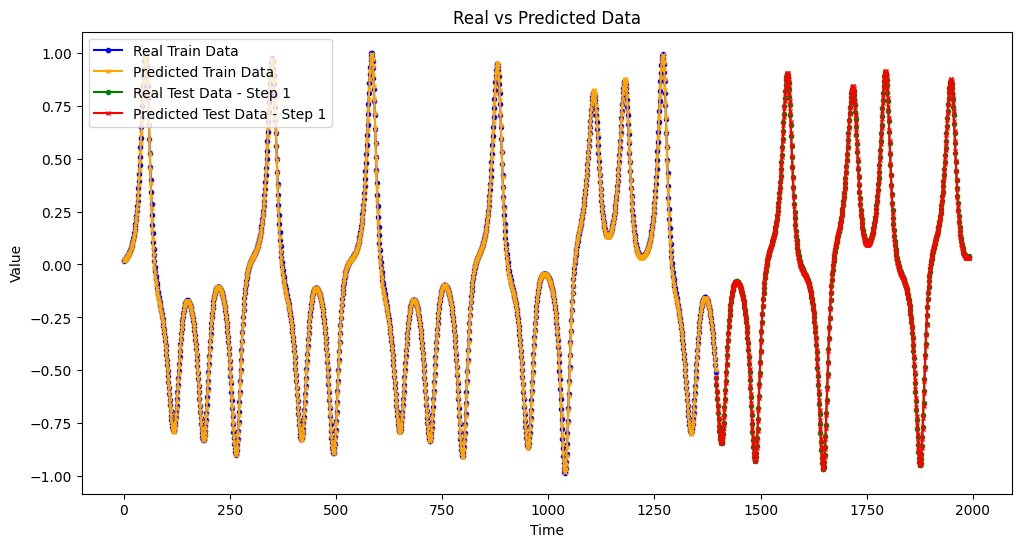

In [26]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load data function
def LoadData(path):
    data = pd.read_excel(path, header=None).to_numpy()
    return data

# Normalize data
def normalizeData(data):
    for ii in range(8):
        data[:, ii] = data[:, ii] / np.max(data[:, ii])
    return data

def createTimeSeries(data):
    time_series_array = np.zeros((data.shape[0] - 7, 8))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
        time_series_array[i, 0] = data[i]
        time_series_array[i, 1] = data[i + 1]
        time_series_array[i, 2] = data[i + 2]
        time_series_array[i, 3] = data[i + 3]
        time_series_array[i, 4] = data[i + 4]
        time_series_array[i, 5] = data[i + 5]
        time_series_array[i, 6] = data[i + 6]
        time_series_array[i, 7] = data[i + 7]

    return  time_series_array

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.01, epochs=100):
        self.input_neurons = input_neurons # n0
        self.hidden_neurons = hidden_neurons # n1
        self.output_neurons = output_neurons # n2
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights
        np.random.seed(40)
        self.w1 = np.random.uniform(-1, 1, (input_neurons, hidden_neurons)) # n0 * n1
        self.w2 = np.random.uniform(-1, 1, (hidden_neurons, output_neurons)) # n1 * n2

        # Initialize biases
        self.b1 = np.random.uniform(-1, 1, (1, hidden_neurons)) # n1
        self.b2 = np.random.uniform(-1, 1, (1, output_neurons)) # n2

        self.train_mse = []
        self.test_mse = []

    def f(self, x):
        return np.cos(x)

    def dfnet(self, x):
        return -np.sin(x)

    def pureline(self, x):
        return x;

    def pureline_derivative(self,x):
        return np.ones_like(x)

    def feedforward(self, input_data):

        self.x = input_data

        # Hidden layer calculations (including bias)
        self.net1 = np.dot(self.x, self.w1) + self.b1
        self.o1 = self.f(self.net1)

        # Output layer calculations (including bias)
        self.net2 = np.dot(self.o1, self.w2) + self.b2
        self.o2 = self.pureline(self.net2) # Linear activation for regression
        return self.o2

    def backpropagation(self, x, y_true):
        # Calculate errors
        self.error = y_true - self.o2

        # Update weights and biases
        self.w2 -= self.learning_rate * -1 * (self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.o1).T # n1 * n2
        self.b2 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) # n2

        self.w1 -= self.learning_rate * -1 * ((self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dfnet(self.net1))).T @ self.x).T # n0 * n1
        self.b1 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dfnet(self.net1)) # Update hidden bias

        return np.mean(self.error ** 2)

    def train(self, X_train, y_train, X_test, y_test):

      with tqdm(total=self.epochs, desc="Training Progress", unit="epoch") as pbar: # Progress bar - not related to Neural Network

        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X_train)):
                self.feedforward(X_train[i:i+1])
                total_error += self.backpropagation(X_train[i:i+1],y_train[i:i+1])

            train_mse = total_error / len(X_train)
            self.train_mse.append(train_mse)

            # Calculate test MSE at the end of each epoch
            test_predictions = self.predict(X_test)
            test_mse = np.mean((y_test.flatten() - np.array(test_predictions)) ** 2)
            self.test_mse.append(test_mse)

            pbar.update(1)            # Update the progress bar
        print(f"Epoch {epoch+1}: Train MSE = {train_mse}, Test MSE = {test_mse}")

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            predictions.append(self.feedforward(X[i:i+1])[0, 0])
        return predictions

# import data

file_path = 'Lorenz Dataset.xlsx'
data = LoadData(file_path)
data = createTimeSeries(data)
data = normalizeData(data)

num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

X_train, X_test = data[:num_train, :5] , data[num_train:, :5]
Y_train, Y_test = data[:num_train, -1] , data[num_train:, -1]

# Initialize and train the neural network

learning_rate = 0.005
epochs = 50
hidden_neurons = 10
input_neurons = X_train.shape[1]
output_neurons = 1


nn = NeuralNetwork(input_neurons, hidden_neurons, output_neurons, learning_rate, epochs)
nn.train(X_train, Y_train, X_test, Y_test)


# Plot the MSE values after training
# Plot the MSE values after training with log scale on y-axis
plt.figure(figsize=(10, 6))
plt.plot(range(nn.epochs), nn.train_mse, label='Train MSE', color='blue')
plt.plot(range(nn.epochs), nn.test_mse, label='Test MSE', color='red')
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.xlabel('Epochs')
plt.ylabel('MSE (Log Scale)')
plt.title('Training and Testing MSE Over Epochs (Log Scale)')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


# Predict and plot real vs. predicted values for training and testing data
train_predictions = nn.predict(X_train)
test_predictions = nn.predict(X_test)

# Plot real vs predicted values (no denormalization needed)
plt.figure(figsize=(12, 6))
plt.plot(range(len(Y_train)), Y_train, label='Real Train Data', color='blue', marker='o', markersize=3)
plt.plot(range(len(train_predictions)), train_predictions, label='Predicted Train Data', color='orange', marker='x', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), Y_test, label='Real Test Data - Step 1', color='green', marker='o', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), np.array(test_predictions), label='Predicted Test Data - Step 1', color='red', marker='x', markersize=3)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Real vs Predicted Data')
plt.show()

# **Case 3**: sinus with phase & frequency:

## * **Activation function:**

$f(net) = sin(\alpha * net + \theta)$

## * **feed forward equations:**
$input = X$

$net^{1} = w^{1}*X + b^{1}$

$ o^{1} = f(net^{1})$

$ net^{2} = w^{2}*o^{1} + b^{2}$

$ o^{2} = f(net^{2})$

## * **Back propagation equations:**

$W2(k+1) = W2(k) - \eta * \frac{\partial E}{\partial w^{2}}$

$W1(k+1) = W1(k) - \eta * \frac{\partial E}{\partial w^{1}}$

$b2(k+1) = b2(k) - \eta * \frac{\partial E}{\partial b^{2}}$

$b1(k+1) = b1(k) - \eta * \frac{\partial E}{\partial b^{1}}$

$\alpha1(k+1) = \alpha1(k) - \eta * \frac{\partial E}{\partial b^{1}}$

$\theta1(k+1) = \theta1(k) - \eta * \frac{\partial E}{\partial b^{1}}$


## * **Gradient descent equations:**

$\frac{\partial E}{\partial w^{2}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial w^{2}}$

$\frac{\partial E}{\partial b^{2}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial b^{2}}$

$\frac{\partial E}{\partial w^{1}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}} * \frac{\partial o^{1}}{\partial net^{1}} * \frac{\partial net^{1}}{\partial w^{1}}$

$\frac{\partial E}{\partial b^{1}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}} * \frac{\partial o^{1}}{\partial net^{1}} * \frac{\partial net^{1}}{\partial b^{1}}$

$\frac{\partial E}{\partial \alpha^{1}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}} * \frac{\partial o^{1}}{\partial \alpha^{1}}$

$\frac{\partial E}{\partial \theta^{1}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}} * \frac{\partial o^{1}}{\partial \theta^{1}}$


Training Progress: 100%|██████████| 50/50 [00:18<00:00,  2.64epoch/s]


Epoch 50: Train MSE = 0.0005139216294666741, Test MSE = 0.0008237659979524219


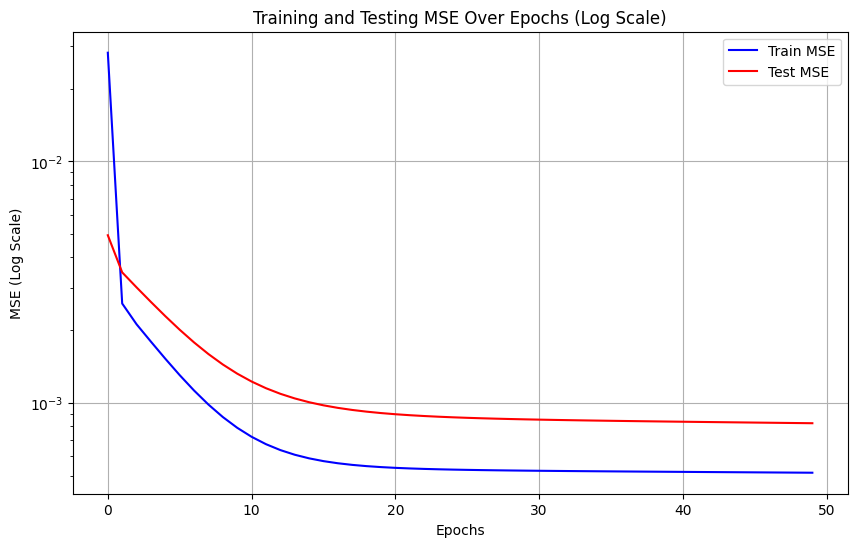

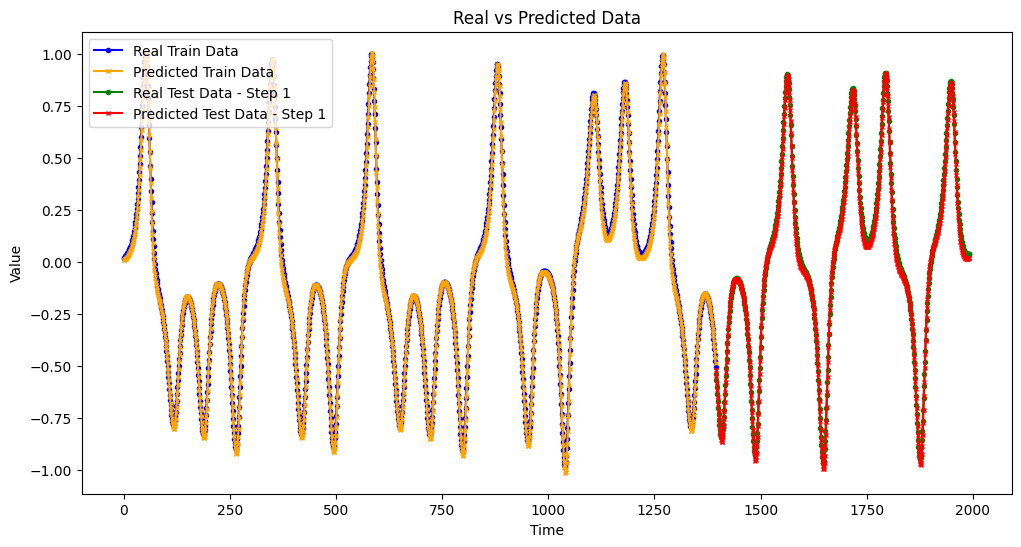

In [27]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load data function
def LoadData(path):
    data = pd.read_excel(path, header=None).to_numpy()
    return data

# Normalize data
def normalizeData(data):
    for ii in range(8):
        data[:, ii] = data[:, ii] / np.max(data[:, ii])
    return data

def createTimeSeries(data):
    time_series_array = np.zeros((data.shape[0] - 7, 8))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
        time_series_array[i, 0] = data[i]
        time_series_array[i, 1] = data[i + 1]
        time_series_array[i, 2] = data[i + 2]
        time_series_array[i, 3] = data[i + 3]
        time_series_array[i, 4] = data[i + 4]
        time_series_array[i, 5] = data[i + 5]
        time_series_array[i, 6] = data[i + 6]
        time_series_array[i, 7] = data[i + 7]

    return  time_series_array

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.01, epochs=100):
        self.input_neurons = input_neurons # n0
        self.hidden_neurons = hidden_neurons # n1
        self.output_neurons = output_neurons # n2
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights
        np.random.seed(40)
        self.w1 = np.random.uniform(-1, 1, (input_neurons, hidden_neurons)) # n0 * n1
        self.w2 = np.random.uniform(-1, 1, (hidden_neurons, output_neurons)) # n1 * n2

        # Initialize biases
        self.b1 = np.random.uniform(-1, 1, (1, hidden_neurons)) # n1
        self.b2 = np.random.uniform(-1, 1, (1, output_neurons)) # n2

        # Initialize frequencies and phases:
        self.a1 = np.random.uniform(-1, 1, (1, hidden_neurons))
        self.t1 = np.random.uniform(-1, 1, (1, hidden_neurons))

        self.train_mse = []
        self.test_mse = []

    def f(self, x, a, t):
        return np.sin(a * x + t)

    def dfnet(self, x, a, t):
        return a * np.cos(a * x + t)

    def dfalpha(self, x, a, t):
        return x * np.cos(a * x + t)

    def dftheta(self, x, a, t):
        return np.cos(a * x + t)

    def pureline(self, x):
        return x;

    def pureline_derivative(self,x):
        return np.ones_like(x)

    def feedforward(self, input_data):

        self.x = input_data

        # Hidden layer calculations (including bias)
        self.net1 = np.dot(self.x, self.w1) + self.b1
        self.o1 = self.f(self.net1, self.a1, self.t1)

        # Output layer calculations (including bias)
        self.net2 = np.dot(self.o1, self.w2) + self.b2
        self.o2 = self.pureline(self.net2) # Linear activation for regression
        return self.o2

    def backpropagation(self, x, y_true):
        # Calculate errors
        self.error = y_true - self.o2

        # Update weights and biases
        self.w2 -= self.learning_rate * -1 * (self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.o1).T # n1 * n2
        self.b2 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) # n2

        self.w1 -= self.learning_rate * -1 * ((self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dfnet(self.net1, self.a1, self.t1))).T @ self.x).T # n0 * n1
        self.b1 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dfnet(self.net1, self.a1, self.t1)) # Update hidden bias

        self.a1 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dfalpha(self.net1, self.a1, self.t1))
        self.t1 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dftheta(self.net1, self.a1, self.t1))

        return np.mean(self.error ** 2)

    def train(self, X_train, y_train, X_test, y_test):

      with tqdm(total=self.epochs, desc="Training Progress", unit="epoch") as pbar: # Progress bar - not related to Neural Network

        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X_train)):
                self.feedforward(X_train[i:i+1])
                total_error += self.backpropagation(X_train[i:i+1],y_train[i:i+1])

            train_mse = total_error / len(X_train)
            self.train_mse.append(train_mse)

            # Calculate test MSE at the end of each epoch
            test_predictions = self.predict(X_test)
            test_mse = np.mean((y_test.flatten() - np.array(test_predictions)) ** 2)
            self.test_mse.append(test_mse)

            pbar.update(1)            # Update the progress bar
        print(f"Epoch {epoch+1}: Train MSE = {train_mse}, Test MSE = {test_mse}")

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            predictions.append(self.feedforward(X[i:i+1])[0, 0])
        return predictions

# import data

file_path = 'Lorenz Dataset.xlsx'
data = LoadData(file_path)
data = createTimeSeries(data)
data = normalizeData(data)

num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

X_train, X_test = data[:num_train, :5] , data[num_train:, :5]
Y_train, Y_test = data[:num_train, -1] , data[num_train:, -1]

# Initialize and train the neural network

learning_rate = 0.005
epochs = 50
hidden_neurons = 3
input_neurons = X_train.shape[1]
output_neurons = 1


nn = NeuralNetwork(input_neurons, hidden_neurons, output_neurons, learning_rate, epochs)
nn.train(X_train, Y_train, X_test, Y_test)


# Plot the MSE values after training
# Plot the MSE values after training with log scale on y-axis
plt.figure(figsize=(10, 6))
plt.plot(range(nn.epochs), nn.train_mse, label='Train MSE', color='blue')
plt.plot(range(nn.epochs), nn.test_mse, label='Test MSE', color='red')
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.xlabel('Epochs')
plt.ylabel('MSE (Log Scale)')
plt.title('Training and Testing MSE Over Epochs (Log Scale)')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


# Predict and plot real vs. predicted values for training and testing data
train_predictions = nn.predict(X_train)
test_predictions = nn.predict(X_test)

# Plot real vs predicted values (no denormalization needed)
plt.figure(figsize=(12, 6))
plt.plot(range(len(Y_train)), Y_train, label='Real Train Data', color='blue', marker='o', markersize=3)
plt.plot(range(len(train_predictions)), train_predictions, label='Predicted Train Data', color='orange', marker='x', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), Y_test, label='Real Test Data - Step 1', color='green', marker='o', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), np.array(test_predictions), label='Predicted Test Data - Step 1', color='red', marker='x', markersize=3)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Real vs Predicted Data')
plt.show()

# **Case 4**: Cosinus with phase & frequency:

$f(net) = cos(\alpha * net + \theta)$

### -Neural Network equations are same as case 3

Training Progress: 100%|██████████| 50/50 [00:19<00:00,  2.56epoch/s]


Epoch 50: Train MSE = 0.00027805313846420815, Test MSE = 0.0006802334428512944


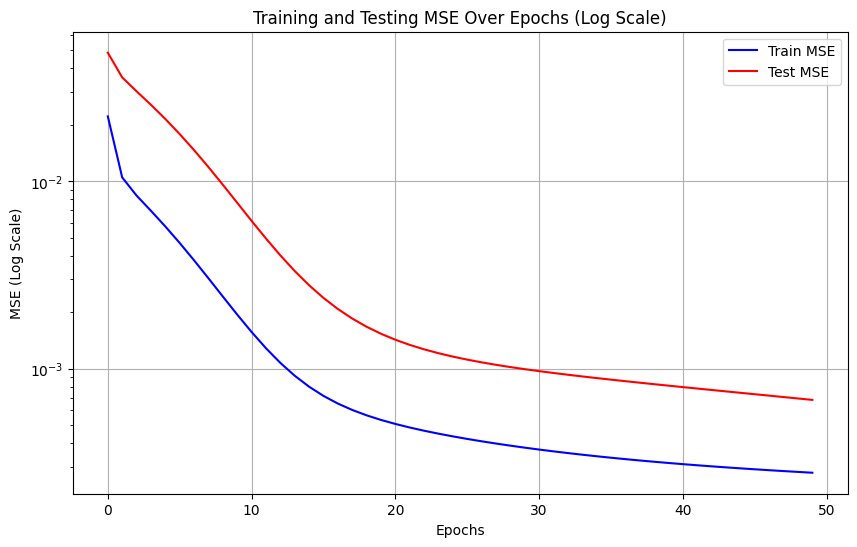

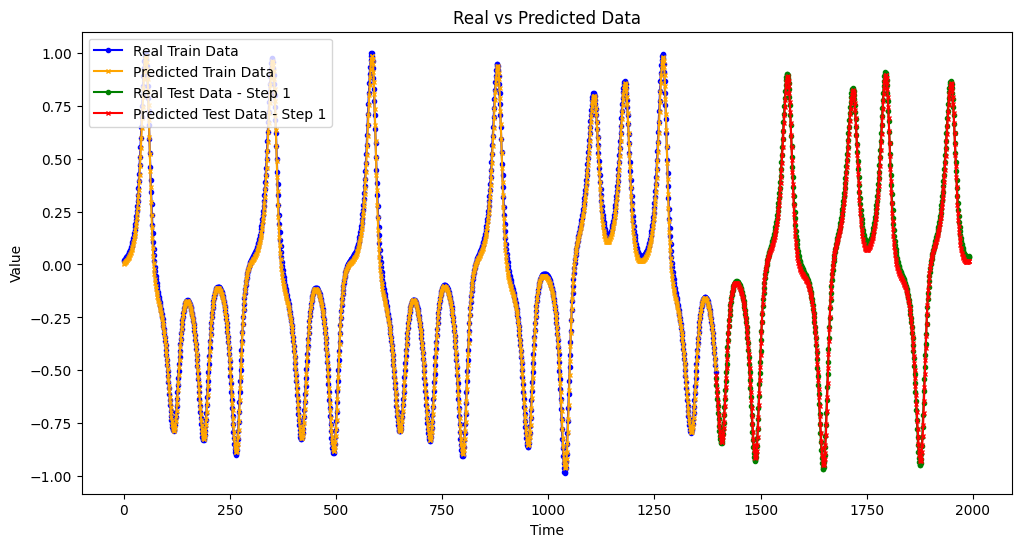

In [28]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load data function
def LoadData(path):
    data = pd.read_excel(path, header=None).to_numpy()
    return data

# Normalize data
def normalizeData(data):
    for ii in range(8):
        data[:, ii] = data[:, ii] / np.max(data[:, ii])
    return data

def createTimeSeries(data):
    time_series_array = np.zeros((data.shape[0] - 7, 8))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
        time_series_array[i, 0] = data[i]
        time_series_array[i, 1] = data[i + 1]
        time_series_array[i, 2] = data[i + 2]
        time_series_array[i, 3] = data[i + 3]
        time_series_array[i, 4] = data[i + 4]
        time_series_array[i, 5] = data[i + 5]
        time_series_array[i, 6] = data[i + 6]
        time_series_array[i, 7] = data[i + 7]

    return  time_series_array

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.01, epochs=100):
        self.input_neurons = input_neurons # n0
        self.hidden_neurons = hidden_neurons # n1
        self.output_neurons = output_neurons # n2
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights
        np.random.seed(40)
        self.w1 = np.random.uniform(-1, 1, (input_neurons, hidden_neurons)) # n0 * n1
        self.w2 = np.random.uniform(-1, 1, (hidden_neurons, output_neurons)) # n1 * n2

        # Initialize biases
        self.b1 = np.random.uniform(-1, 1, (1, hidden_neurons)) # n1
        self.b2 = np.random.uniform(-1, 1, (1, output_neurons)) # n2

        # Initialize frequencies and phases:
        self.a1 = np.random.uniform(-1, 1, (1, hidden_neurons))
        self.t1 = np.random.uniform(-1, 1, (1, hidden_neurons))

        self.train_mse = []
        self.test_mse = []

    def f(self, x, a, t):
        return np.cos(a * x + t)

    def dfnet(self, x, a, t):
        return -a * np.sin(a * x + t)

    def dfalpha(self, x, a, t):
        return -x * np.sin(a * x + t)

    def dftheta(self, x, a, t):
        return -np.sin(a * x + t)

    def pureline(self, x):
        return x;

    def pureline_derivative(self,x):
        return np.ones_like(x)

    def feedforward(self, input_data):

        self.x = input_data

        # Hidden layer calculations (including bias)
        self.net1 = np.dot(self.x, self.w1) + self.b1
        self.o1 = self.f(self.net1, self.a1, self.t1)

        # Output layer calculations (including bias)
        self.net2 = np.dot(self.o1, self.w2) + self.b2
        self.o2 = self.pureline(self.net2) # Linear activation for regression
        return self.o2

    def backpropagation(self, x, y_true):
        # Calculate errors
        self.error = y_true - self.o2

        # Update weights and biases
        self.w2 -= self.learning_rate * -1 * (self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.o1).T # n1 * n2
        self.b2 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) # n2

        self.w1 -= self.learning_rate * -1 * ((self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dfnet(self.net1, self.a1, self.t1))).T @ self.x).T # n0 * n1
        self.b1 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dfnet(self.net1, self.a1, self.t1)) # Update hidden bias

        self.a1 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dfalpha(self.net1, self.a1, self.t1))
        self.t1 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dftheta(self.net1, self.a1, self.t1))

        return np.mean(self.error ** 2)

    def train(self, X_train, y_train, X_test, y_test):

      with tqdm(total=self.epochs, desc="Training Progress", unit="epoch") as pbar: # Progress bar - not related to Neural Network

        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X_train)):
                self.feedforward(X_train[i:i+1])
                total_error += self.backpropagation(X_train[i:i+1],y_train[i:i+1])

            train_mse = total_error / len(X_train)
            self.train_mse.append(train_mse)

            # Calculate test MSE at the end of each epoch
            test_predictions = self.predict(X_test)
            test_mse = np.mean((y_test.flatten() - np.array(test_predictions)) ** 2)
            self.test_mse.append(test_mse)

            pbar.update(1)            # Update the progress bar
        print(f"Epoch {epoch+1}: Train MSE = {train_mse}, Test MSE = {test_mse}")

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            predictions.append(self.feedforward(X[i:i+1])[0, 0])
        return predictions

# import data

file_path = 'Lorenz Dataset.xlsx'
data = LoadData(file_path)
data = createTimeSeries(data)
data = normalizeData(data)

num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

X_train, X_test = data[:num_train, :5] , data[num_train:, :5]
Y_train, Y_test = data[:num_train, -1] , data[num_train:, -1]

# Initialize and train the neural network

learning_rate = 0.005
epochs = 50
hidden_neurons = 10
input_neurons = X_train.shape[1]
output_neurons = 1


nn = NeuralNetwork(input_neurons, hidden_neurons, output_neurons, learning_rate, epochs)
nn.train(X_train, Y_train, X_test, Y_test)


# Plot the MSE values after training
# Plot the MSE values after training with log scale on y-axis
plt.figure(figsize=(10, 6))
plt.plot(range(nn.epochs), nn.train_mse, label='Train MSE', color='blue')
plt.plot(range(nn.epochs), nn.test_mse, label='Test MSE', color='red')
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.xlabel('Epochs')
plt.ylabel('MSE (Log Scale)')
plt.title('Training and Testing MSE Over Epochs (Log Scale)')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


# Predict and plot real vs. predicted values for training and testing data
train_predictions = nn.predict(X_train)
test_predictions = nn.predict(X_test)

# Plot real vs predicted values (no denormalization needed)
plt.figure(figsize=(12, 6))
plt.plot(range(len(Y_train)), Y_train, label='Real Train Data', color='blue', marker='o', markersize=3)
plt.plot(range(len(train_predictions)), train_predictions, label='Predicted Train Data', color='orange', marker='x', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), Y_test, label='Real Test Data - Step 1', color='green', marker='o', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), np.array(test_predictions), label='Predicted Test Data - Step 1', color='red', marker='x', markersize=3)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Real vs Predicted Data')
plt.show()

# **Case 5**: summation of sinus & Cosinus without phase & frequency:

## * **Activation function:**

$f(net) = sin(net) + cos(net)$

### -Neural Network equations are same as case 1

Training Progress: 100%|██████████| 50/50 [00:12<00:00,  3.93epoch/s]


Epoch 50: Train MSE = 4.363247806893291e-05, Test MSE = 0.00036271795036703456


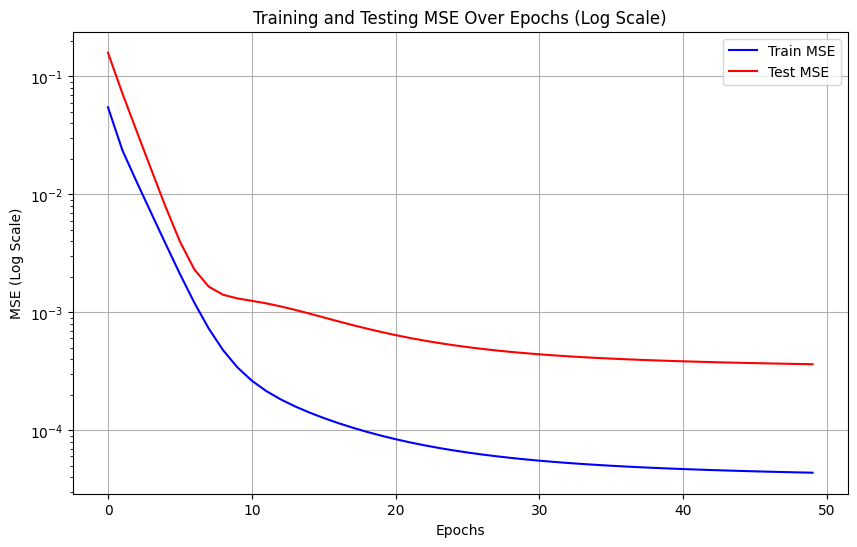

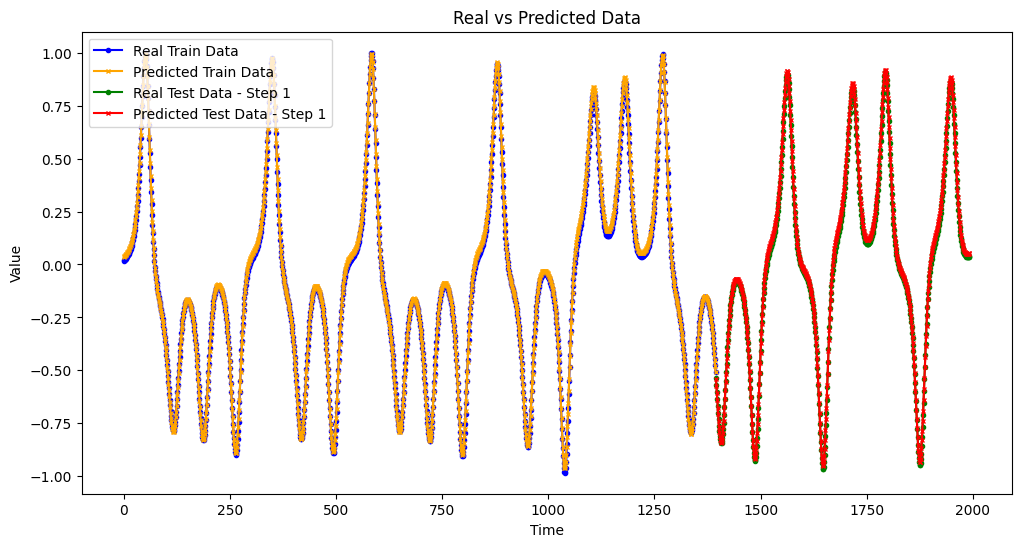

In [29]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load data function
def LoadData(path):
    data = pd.read_excel(path, header=None).to_numpy()
    return data

# Normalize data
def normalizeData(data):
    for ii in range(8):
        data[:, ii] = data[:, ii] / np.max(data[:, ii])
    return data

def createTimeSeries(data):
    time_series_array = np.zeros((data.shape[0] - 7, 8))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
        time_series_array[i, 0] = data[i]
        time_series_array[i, 1] = data[i + 1]
        time_series_array[i, 2] = data[i + 2]
        time_series_array[i, 3] = data[i + 3]
        time_series_array[i, 4] = data[i + 4]
        time_series_array[i, 5] = data[i + 5]
        time_series_array[i, 6] = data[i + 6]
        time_series_array[i, 7] = data[i + 7]

    return  time_series_array

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.01, epochs=100):
        self.input_neurons = input_neurons # n0
        self.hidden_neurons = hidden_neurons # n1
        self.output_neurons = output_neurons # n2
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights
        np.random.seed(40)
        self.w1 = np.random.uniform(-1, 1, (input_neurons, hidden_neurons)) # n0 * n1
        self.w2 = np.random.uniform(-1, 1, (hidden_neurons, output_neurons)) # n1 * n2

        # Initialize biases
        self.b1 = np.random.uniform(-1, 1, (1, hidden_neurons)) # n1
        self.b2 = np.random.uniform(-1, 1, (1, output_neurons)) # n2

        # Initialize frequencies and phases:
        self.a1 = np.random.uniform(-1, 1, (1, hidden_neurons))
        self.t1 = np.random.uniform(-1, 1, (1, hidden_neurons))

        self.train_mse = []
        self.test_mse = []

    def f(self, x):
        return np.sin(x) + np.cos(x)

    def dfnet(self, x):
        return np.cos(x) - np.sin(x)

    def pureline(self, x):
        return x;

    def pureline_derivative(self,x):
        return np.ones_like(x)

    def feedforward(self, input_data):

        self.x = input_data

        # Hidden layer calculations (including bias)
        self.net1 = np.dot(self.x, self.w1) + self.b1
        self.o1 = self.f(self.net1)

        # Output layer calculations (including bias)
        self.net2 = np.dot(self.o1, self.w2) + self.b2
        self.o2 = self.pureline(self.net2) # Linear activation for regression
        return self.o2

    def backpropagation(self, x, y_true):
        # Calculate errors
        self.error = y_true - self.o2

        # Update weights and biases
        self.w2 -= self.learning_rate * -1 * (self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.o1).T # n1 * n2
        self.b2 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) # n2

        self.w1 -= self.learning_rate * -1 * ((self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dfnet(self.net1))).T @ self.x).T # n0 * n1
        self.b1 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dfnet(self.net1)) # Update hidden bias

        return np.mean(self.error ** 2)

    def train(self, X_train, y_train, X_test, y_test):

      with tqdm(total=self.epochs, desc="Training Progress", unit="epoch") as pbar: # Progress bar - not related to Neural Network

        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X_train)):
                self.feedforward(X_train[i:i+1])
                total_error += self.backpropagation(X_train[i:i+1],y_train[i:i+1])

            train_mse = total_error / len(X_train)
            self.train_mse.append(train_mse)

            # Calculate test MSE at the end of each epoch
            test_predictions = self.predict(X_test)
            test_mse = np.mean((y_test.flatten() - np.array(test_predictions)) ** 2)
            self.test_mse.append(test_mse)

            pbar.update(1)            # Update the progress bar
        print(f"Epoch {epoch+1}: Train MSE = {train_mse}, Test MSE = {test_mse}")

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            predictions.append(self.feedforward(X[i:i+1])[0, 0])
        return predictions

# import data

file_path = 'Lorenz Dataset.xlsx'
data = LoadData(file_path)
data = createTimeSeries(data)
data = normalizeData(data)

num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

X_train, X_test = data[:num_train, :5] , data[num_train:, :5]
Y_train, Y_test = data[:num_train, -1] , data[num_train:, -1]

# Initialize and train the neural network

learning_rate = 0.005
epochs = 50
hidden_neurons = 10
input_neurons = X_train.shape[1]
output_neurons = 1


nn = NeuralNetwork(input_neurons, hidden_neurons, output_neurons, learning_rate, epochs)
nn.train(X_train, Y_train, X_test, Y_test)


# Plot the MSE values after training
# Plot the MSE values after training with log scale on y-axis
plt.figure(figsize=(10, 6))
plt.plot(range(nn.epochs), nn.train_mse, label='Train MSE', color='blue')
plt.plot(range(nn.epochs), nn.test_mse, label='Test MSE', color='red')
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.xlabel('Epochs')
plt.ylabel('MSE (Log Scale)')
plt.title('Training and Testing MSE Over Epochs (Log Scale)')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


# Predict and plot real vs. predicted values for training and testing data
train_predictions = nn.predict(X_train)
test_predictions = nn.predict(X_test)

# Plot real vs predicted values (no denormalization needed)
plt.figure(figsize=(12, 6))
plt.plot(range(len(Y_train)), Y_train, label='Real Train Data', color='blue', marker='o', markersize=3)
plt.plot(range(len(train_predictions)), train_predictions, label='Predicted Train Data', color='orange', marker='x', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), Y_test, label='Real Test Data - Step 1', color='green', marker='o', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), np.array(test_predictions), label='Predicted Test Data - Step 1', color='red', marker='x', markersize=3)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Real vs Predicted Data')
plt.show()

# **Case 6**: summation of sinus & Cosinus with phase & frequency:

## * **Activation function:**

$f(\alpha * net + \theta) = sin(\alpha * net + \theta) + cos(\alpha * net + \theta)$

### -Neural Network equations are same as case 3

Training Progress: 100%|██████████| 50/50 [00:20<00:00,  2.44epoch/s]


Epoch 50: Train MSE = 0.00011614255473183469, Test MSE = 0.001054685955868319


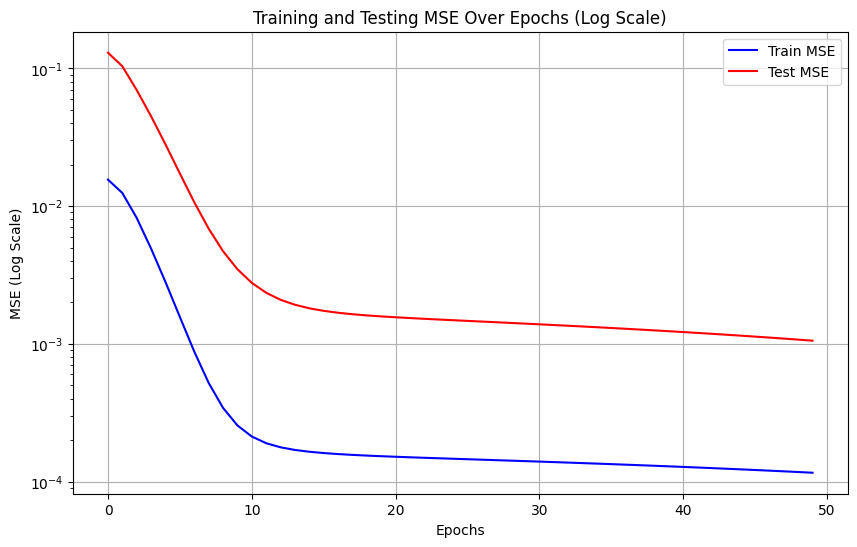

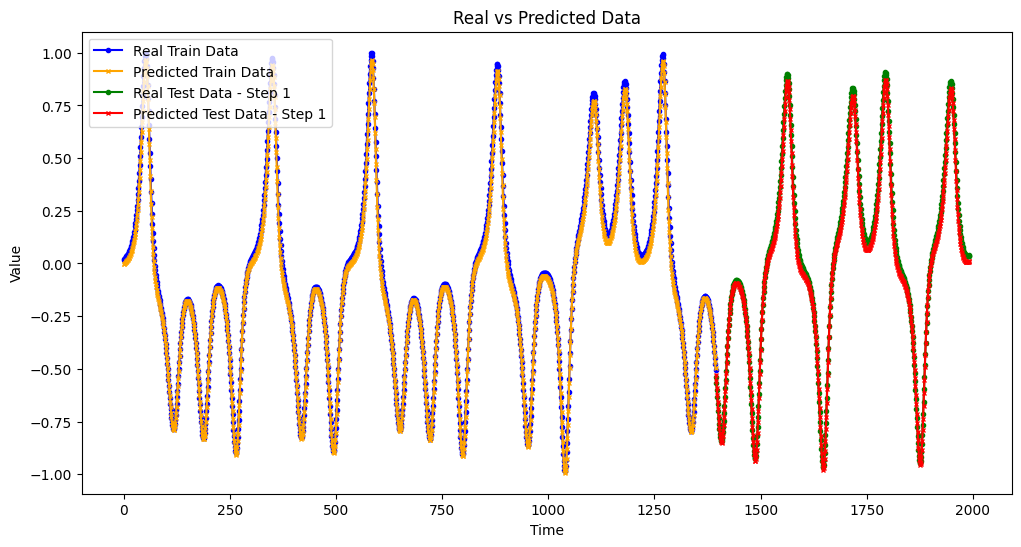

In [30]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load data function
def LoadData(path):
    data = pd.read_excel(path, header=None).to_numpy()
    return data

# Normalize data
def normalizeData(data):
    for ii in range(8):
        data[:, ii] = data[:, ii] / np.max(data[:, ii])
    return data

def createTimeSeries(data):
    time_series_array = np.zeros((data.shape[0] - 7, 8))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
        time_series_array[i, 0] = data[i]
        time_series_array[i, 1] = data[i + 1]
        time_series_array[i, 2] = data[i + 2]
        time_series_array[i, 3] = data[i + 3]
        time_series_array[i, 4] = data[i + 4]
        time_series_array[i, 5] = data[i + 5]
        time_series_array[i, 6] = data[i + 6]
        time_series_array[i, 7] = data[i + 7]

    return  time_series_array

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.01, epochs=100):
        self.input_neurons = input_neurons # n0
        self.hidden_neurons = hidden_neurons # n1
        self.output_neurons = output_neurons # n2
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights
        np.random.seed(40)
        self.w1 = np.random.uniform(-1, 1, (input_neurons, hidden_neurons)) # n0 * n1
        self.w2 = np.random.uniform(-1, 1, (hidden_neurons, output_neurons)) # n1 * n2

        # Initialize biases
        self.b1 = np.random.uniform(-1, 1, (1, hidden_neurons)) # n1
        self.b2 = np.random.uniform(-1, 1, (1, output_neurons)) # n2

        # Initialize frequencies and phases:
        self.a1 = np.random.uniform(-1, 1, (1, hidden_neurons))
        self.t1 = np.random.uniform(-1, 1, (1, hidden_neurons))

        self.train_mse = []
        self.test_mse = []

    def f(self, x, a, t):
        return np.sin(a * x + t) + np.cos(a * x + t)

    def dfnet(self, x, a, t):
        return a * np.cos(a * x + t) - a * np.sin(a * x + t)

    def dfalpha(self, x, a, t):
        return x * np.cos(a * x + t) - x* np.sin(a * x + t)

    def dftheta(self, x, a, t):
        return np.cos(a * x + t) - np.sin(a * x + t)

    def pureline(self, x):
        return x;

    def pureline_derivative(self,x):
        return np.ones_like(x)

    def feedforward(self, input_data):

        self.x = input_data

        # Hidden layer calculations (including bias)
        self.net1 = np.dot(self.x, self.w1) + self.b1
        self.o1 = self.f(self.net1, self.a1, self.t1)

        # Output layer calculations (including bias)
        self.net2 = np.dot(self.o1, self.w2) + self.b2
        self.o2 = self.pureline(self.net2) # Linear activation for regression
        return self.o2

    def backpropagation(self, x, y_true):
        # Calculate errors
        self.error = y_true - self.o2

        # Update weights and biases
        self.w2 -= self.learning_rate * -1 * (self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.o1).T # n1 * n2
        self.b2 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) # n2

        self.w1 -= self.learning_rate * -1 * ((self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dfnet(self.net1, self.a1, self.t1))).T @ self.x).T # n0 * n1
        self.b1 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dfnet(self.net1, self.a1, self.t1)) # Update hidden bias

        self.a1 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dfalpha(self.net1, self.a1, self.t1))
        self.t1 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2.T @ np.diagflat(self.dftheta(self.net1, self.a1, self.t1))

        return np.mean(self.error ** 2)

    def train(self, X_train, y_train, X_test, y_test):

      with tqdm(total=self.epochs, desc="Training Progress", unit="epoch") as pbar: # Progress bar - not related to Neural Network

        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X_train)):
                self.feedforward(X_train[i:i+1])
                total_error += self.backpropagation(X_train[i:i+1],y_train[i:i+1])

            train_mse = total_error / len(X_train)
            self.train_mse.append(train_mse)

            # Calculate test MSE at the end of each epoch
            test_predictions = self.predict(X_test)
            test_mse = np.mean((y_test.flatten() - np.array(test_predictions)) ** 2)
            self.test_mse.append(test_mse)

            pbar.update(1)            # Update the progress bar
        print(f"Epoch {epoch+1}: Train MSE = {train_mse}, Test MSE = {test_mse}")

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            predictions.append(self.feedforward(X[i:i+1])[0, 0])
        return predictions

# import data

file_path = 'Lorenz Dataset.xlsx'
data = LoadData(file_path)
data = createTimeSeries(data)
data = normalizeData(data)

num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

X_train, X_test = data[:num_train, :5] , data[num_train:, :5]
Y_train, Y_test = data[:num_train, -1] , data[num_train:, -1]

# Initialize and train the neural network

learning_rate = 0.005
epochs = 50
hidden_neurons = 10
input_neurons = X_train.shape[1]
output_neurons = 1


nn = NeuralNetwork(input_neurons, hidden_neurons, output_neurons, learning_rate, epochs)
nn.train(X_train, Y_train, X_test, Y_test)


# Plot the MSE values after training
# Plot the MSE values after training with log scale on y-axis
plt.figure(figsize=(10, 6))
plt.plot(range(nn.epochs), nn.train_mse, label='Train MSE', color='blue')
plt.plot(range(nn.epochs), nn.test_mse, label='Test MSE', color='red')
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.xlabel('Epochs')
plt.ylabel('MSE (Log Scale)')
plt.title('Training and Testing MSE Over Epochs (Log Scale)')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


# Predict and plot real vs. predicted values for training and testing data
train_predictions = nn.predict(X_train)
test_predictions = nn.predict(X_test)

# Plot real vs predicted values (no denormalization needed)
plt.figure(figsize=(12, 6))
plt.plot(range(len(Y_train)), Y_train, label='Real Train Data', color='blue', marker='o', markersize=3)
plt.plot(range(len(train_predictions)), train_predictions, label='Predicted Train Data', color='orange', marker='x', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), Y_test, label='Real Test Data - Step 1', color='green', marker='o', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), np.array(test_predictions), label='Predicted Test Data - Step 1', color='red', marker='x', markersize=3)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Real vs Predicted Data')
plt.show()

# **Case 7**: sinus & Cosinus without phase & frequency:

## * **Activation function:**

\begin{equation}
f(net) = \begin{cases}
f(net) = sin(net) \\
and\\
f(net) = cos(net) \\
\end{cases}
\end{equation}

## * **Feed Forward Equations:**

$input = X$

$net^{1} = w^{1}*X + b^{1}$

\begin{equation}
o^{1} = f(net^{1}) = \begin{cases}
o^{1}_{c} = sin(net) \\
o^{1}_{s} = cos(net) \\
\end{cases}
\end{equation}

Number of the rows in w2 matrix is doubled: #(2*n2,n1)

$ net^{2} = w^{2}_{2k-1}*o^{1}_{s} + w^{2}_{2k}*o^{1}_{c} + b^{2}$

$ o^{2} = f(net^{2})$


## * **Back propagation equations:**

$W2_{2k-1}(k+1) = W2_{2k-1}(k) - \eta * \frac{\partial E}{\partial w^{2}_{2k-1}}$

$W2_{2k}(k+1) = W2_{2k}(k) - \eta * \frac{\partial E}{\partial w^{2}_{2k}}$

$W1(k+1) = W1(k) - \eta * \frac{\partial E}{\partial w^{1}}$

$b2(k+1) = b2(k) - \eta * \frac{\partial E}{\partial b^{2}}$

$b1(k+1) = b1(k) - \eta * \frac{\partial E}{\partial b^{1}}$

## * **Gradient descent equations:**

$\frac{\partial E}{\partial w^{2}_{2k-1}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial w^{2}_{2k-1}}$

$\frac{\partial E}{\partial w^{2}_{2k}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial w^{2}_{2k}}$

$\frac{\partial E}{\partial b^{2}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial b^{2}}$

$\frac{\partial E}{\partial w^{1}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}_{s}} * \frac{\partial o^{1}_{s}}{\partial net^{1}} * \frac{\partial net^{1}}{\partial w^{1}} + \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}_{c}} * \frac{\partial o^{1}_{c}}{\partial net^{1}} * \frac{\partial net^{1}}{\partial w^{1}}$

$\frac{\partial E}{\partial b^{1}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}_{s}} * \frac{\partial o^{1}_{s}}{\partial net^{1}} * \frac{\partial net^{1}}{\partial b^{1}} + \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}_{c}} * \frac{\partial o^{1}_{c}}{\partial net^{1}} * \frac{\partial net^{1}}{\partial b^{1}}$



Training Progress: 100%|██████████| 50/50 [00:16<00:00,  3.08epoch/s]


Epoch 50: Train MSE = 0.00037931658000235337, Test MSE = 0.0005096861310592259


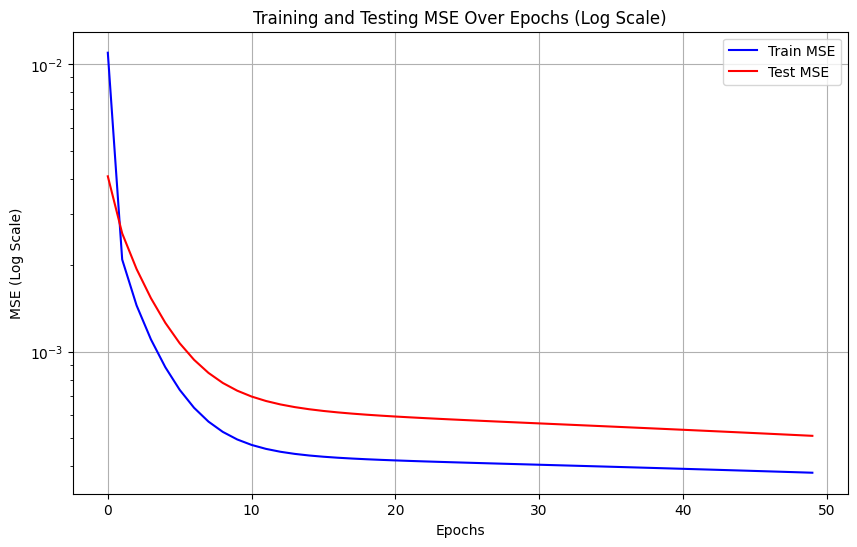

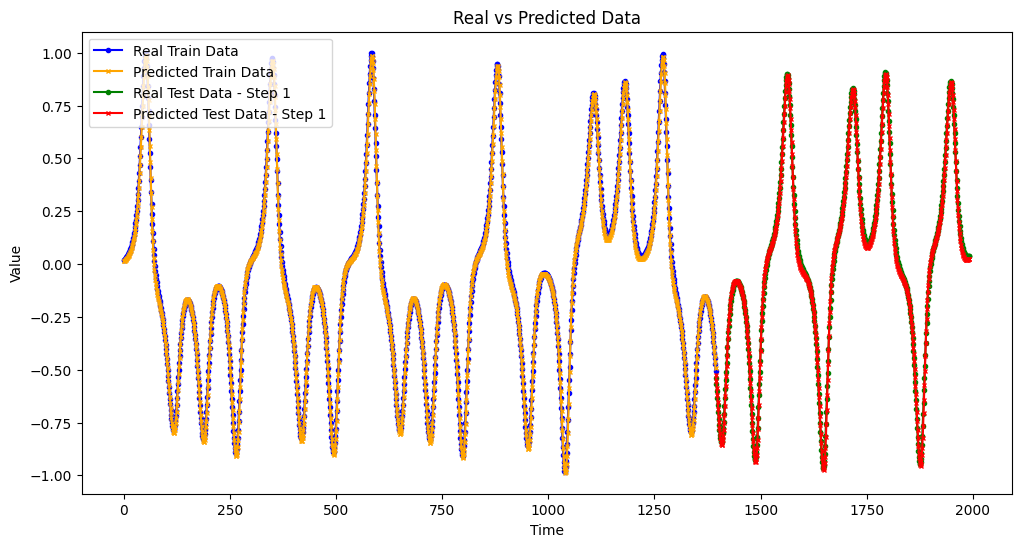

In [21]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load data function
def LoadData(path):
    data = pd.read_excel(path, header=None).to_numpy()
    return data

# Normalize data
def normalizeData(data):
    for ii in range(8):
        data[:, ii] = data[:, ii] / np.max(data[:, ii])
    return data

def createTimeSeries(data):
    time_series_array = np.zeros((data.shape[0] - 7, 8))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
        time_series_array[i, 0] = data[i]
        time_series_array[i, 1] = data[i + 1]
        time_series_array[i, 2] = data[i + 2]
        time_series_array[i, 3] = data[i + 3]
        time_series_array[i, 4] = data[i + 4]
        time_series_array[i, 5] = data[i + 5]
        time_series_array[i, 6] = data[i + 6]
        time_series_array[i, 7] = data[i + 7]

    return  time_series_array

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.01, epochs=100):
        self.input_neurons = input_neurons # n0
        self.hidden_neurons = hidden_neurons # n1
        self.output_neurons = output_neurons # n2
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights
        np.random.seed(40)
        self.w1 = np.random.uniform(-1, 1, (input_neurons, hidden_neurons)) # n0 * n1
        self.w2s = np.random.uniform(-1, 1, (hidden_neurons, output_neurons)) # n1 * n2
        self.w2c = np.random.uniform(-1, 1, (hidden_neurons, output_neurons)) # n1 * n2

        # Initialize biases
        self.b1 = np.random.uniform(-1, 1, (1, hidden_neurons)) # n1
        self.b2 = np.random.uniform(-1, 1, (1, output_neurons)) # n2

        # Initialize frequencies and phases:
        self.a1 = np.random.uniform(-1, 1, (1, hidden_neurons))
        self.t1 = np.random.uniform(-1, 1, (1, hidden_neurons))

        self.train_mse = []
        self.test_mse = []

    def f(self, x, q):
      if (q==1):
        return np.sin(x)
      elif(q==2):
        return np.cos(x)

    def dfnet(self, x, q):
      if (q==1):
        return np.cos(x)
      elif (q==2):
        return - np.sin(x)

    def pureline(self, x):
        return x;

    def pureline_derivative(self,x):
        return np.ones_like(x)

    def feedforward(self, input_data):

        self.x = input_data

        # Hidden layer calculations (including bias)
        self.net1 = np.dot(self.x, self.w1) + self.b1
        self.o1s = self.f(self.net1, 1)
        self.o1c = self.f(self.net1, 2)

        # Output layer calculations (including bias)
        self.net2 = np.dot(self.o1s, self.w2s) + np.dot(self.o1c, self.w2c) + self.b2

        self.o2 = self.pureline(self.net2) # Linear activation for regression
        return self.o2

    def backpropagation(self, x, y_true):
        # Calculate errors
        self.error = y_true - self.o2

        # Update weights and biases
        self.w2s -= self.learning_rate * -1 * (self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.o1s).T # n1 * n2
        self.w2c -= self.learning_rate * -1 * (self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.o1c).T # n1 * n2
        self.b2 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) # n2

        self.w1 -= self.learning_rate * -1 * (((self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2s.T @ np.diagflat(self.dfnet(self.net1, 1))).T @ self.x).T
                                             +((self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2c.T @ np.diagflat(self.dfnet(self.net1, 2))).T @ self.x).T )# n0 * n1

        self.b1 -= self.learning_rate * -1 * (self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2s.T @ np.diagflat(self.dfnet(self.net1, 1))
                                             +self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2c.T @ np.diagflat(self.dfnet(self.net1, 2))) # Update hidden bias

        return np.mean(self.error ** 2)

    def train(self, X_train, y_train, X_test, y_test):

      with tqdm(total=self.epochs, desc="Training Progress", unit="epoch") as pbar: # Progress bar - not related to Neural Network

        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X_train)):
                self.feedforward(X_train[i:i+1])
                total_error += self.backpropagation(X_train[i:i+1],y_train[i:i+1])

            train_mse = total_error / len(X_train)
            self.train_mse.append(train_mse)

            # Calculate test MSE at the end of each epoch
            test_predictions = self.predict(X_test)
            test_mse = np.mean((y_test.flatten() - np.array(test_predictions)) ** 2)
            self.test_mse.append(test_mse)

            pbar.update(1)            # Update the progress bar
        print(f"Epoch {epoch+1}: Train MSE = {train_mse}, Test MSE = {test_mse}")

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            predictions.append(self.feedforward(X[i:i+1])[0, 0])
        return predictions

# import data

file_path = 'Lorenz Dataset.xlsx'
data = LoadData(file_path)
data = createTimeSeries(data)
data = normalizeData(data)

num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

X_train, X_test = data[:num_train, :5] , data[num_train:, :5]
Y_train, Y_test = data[:num_train, -1] , data[num_train:, -1]

# Initialize and train the neural network

learning_rate = 0.005
epochs = 50
hidden_neurons = 3
input_neurons = X_train.shape[1]
output_neurons = 1


nn = NeuralNetwork(input_neurons, hidden_neurons, output_neurons, learning_rate, epochs)
nn.train(X_train, Y_train, X_test, Y_test)


# Plot the MSE values after training
# Plot the MSE values after training with log scale on y-axis
plt.figure(figsize=(10, 6))
plt.plot(range(nn.epochs), nn.train_mse, label='Train MSE', color='blue')
plt.plot(range(nn.epochs), nn.test_mse, label='Test MSE', color='red')
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.xlabel('Epochs')
plt.ylabel('MSE (Log Scale)')
plt.title('Training and Testing MSE Over Epochs (Log Scale)')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


# Predict and plot real vs. predicted values for training and testing data
train_predictions = nn.predict(X_train)
test_predictions = nn.predict(X_test)

# Plot real vs predicted values (no denormalization needed)
plt.figure(figsize=(12, 6))
plt.plot(range(len(Y_train)), Y_train, label='Real Train Data', color='blue', marker='o', markersize=3)
plt.plot(range(len(train_predictions)), train_predictions, label='Predicted Train Data', color='orange', marker='x', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), Y_test, label='Real Test Data - Step 1', color='green', marker='o', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), np.array(test_predictions), label='Predicted Test Data - Step 1', color='red', marker='x', markersize=3)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Real vs Predicted Data')
plt.show()

# **Case 8**: sinus & Cosinus with phase & frequency:

## * **Activation Function:**

\begin{equation}
f(n) = \begin{cases}
f(net, \alpha, \theta) = sin(\alpha * net + \theta) \\
and\\
f(net, \alpha, \theta) = cos(\alpha * net + \theta) \\
\end{cases}
\end{equation}

## * **Feed Forward Equations:**

$input = X$

$net^{1} = w^{1}*X + b^{1}$

\begin{equation}
o^{1} = f(net^{1}) = \begin{cases}
o^{1}_{s} = sin(\alpha^{1} * net^{1} + \theta^{1}) \\
o^{1}_{c} = cos(\alpha^{1} * net^{1} + \theta^{1}) \\
\end{cases}
\end{equation}

Number of the rows in w2 matrix is doubled: #(2*n2,n1)

$ net^{2} = w^{2}_{2k-1}*o^{1}_{s} + w^{2}_{2k}*o^{1}_{c} + b^{2}$

$ o^{2} = f(net^{2})$


## * **Back propagation equations:**

$W2_{2k-1}(k+1) = W2_{2k-1}(k) - \eta * \frac{\partial E}{\partial w^{2}_{2k-1}}$

$W2_{2k}(k+1) = W2_{2k}(k) - \eta * \frac{\partial E}{\partial w^{2}_{2k}}$

$W1(k+1) = W1(k) - \eta * \frac{\partial E}{\partial w^{1}}$

$b2(k+1) = b2(k) - \eta * \frac{\partial E}{\partial b^{2}}$

$b1(k+1) = b1(k) - \eta * \frac{\partial E}{\partial b^{1}}$

$\alpha1(k+1) = \alpha1(k) - \eta * \frac{\partial E}{\partial b^{1}}$

$\theta1(k+1) = \theta1(k) - \eta * \frac{\partial E}{\partial b^{1}}$

## * **Gradient descent equations:**

$\frac{\partial E}{\partial w^{2}_{2k-1}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial w^{2}_{2k-1}}$

$\frac{\partial E}{\partial w^{2}_{2k}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial w^{2}_{2k}}$

$\frac{\partial E}{\partial b^{2}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial b^{2}}$

$\frac{\partial E}{\partial w^{1}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}_{s}} * \frac{\partial o^{1}_{s}}{\partial net^{1}} * \frac{\partial net^{1}}{\partial w^{1}} + \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}_{c}} * \frac{\partial o^{1}_{c}}{\partial net^{1}} * \frac{\partial net^{1}}{\partial w^{1}}$

$\frac{\partial E}{\partial b^{1}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}_{s}} * \frac{\partial o^{1}_{s}}{\partial net^{1}} * \frac{\partial net^{1}}{\partial b^{1}} + \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}_{c}} * \frac{\partial o^{1}_{c}}{\partial net^{1}} * \frac{\partial net^{1}}{\partial b^{1}}$

$\frac{\partial E}{\partial \alpha^{1}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}_{s}} * \frac{\partial o^{1}_{s}}{\partial \alpha^{1}} + \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}_{c}} * \frac{\partial o^{1}_{c}}{\partial \alpha^{1}}$

$\frac{\partial E}{\partial \theta^{1}} = \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}_{s}} * \frac{\partial o^{1}_{s}}{\partial \theta^{1}} + \frac{\partial E}{\partial e} * \frac{\partial e}{\partial o^{2}} * \frac{\partial o^{2}}{\partial net^{2}} *\frac{\partial net^{2}}{\partial o^{1}_{c}} * \frac{\partial o^{1}_{c}}{\partial \theta^{1}}$


Training Progress: 100%|██████████| 50/50 [00:29<00:00,  1.72epoch/s]


Epoch 50: Train MSE = 0.000484374864231503, Test MSE = 0.001019875552291042


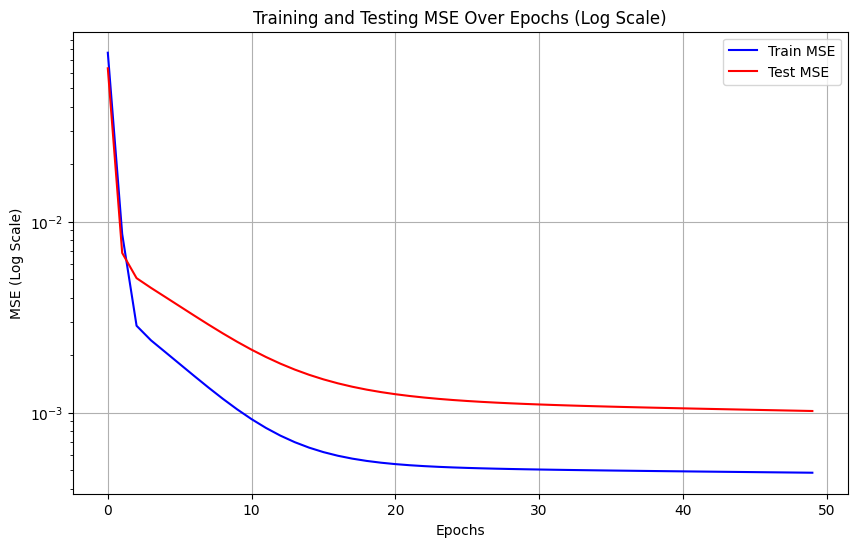

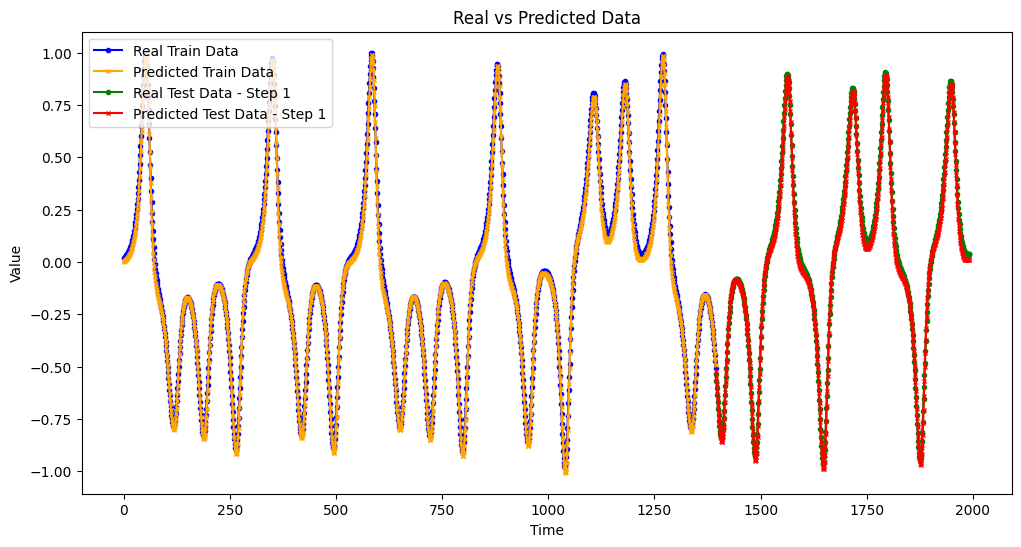

In [22]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load data function
def LoadData(path):
    data = pd.read_excel(path, header=None).to_numpy()
    return data

# Normalize data
def normalizeData(data):
    for ii in range(8):
        data[:, ii] = data[:, ii] / np.max(data[:, ii])
    return data

def createTimeSeries(data):
    time_series_array = np.zeros((data.shape[0] - 7, 8))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
        time_series_array[i, 0] = data[i]
        time_series_array[i, 1] = data[i + 1]
        time_series_array[i, 2] = data[i + 2]
        time_series_array[i, 3] = data[i + 3]
        time_series_array[i, 4] = data[i + 4]
        time_series_array[i, 5] = data[i + 5]
        time_series_array[i, 6] = data[i + 6]
        time_series_array[i, 7] = data[i + 7]

    return  time_series_array

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.01, epochs=100):
        self.input_neurons = input_neurons # n0
        self.hidden_neurons = hidden_neurons # n1
        self.output_neurons = output_neurons # n2
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights
        np.random.seed(40)
        self.w1 = np.random.uniform(-1, 1, (input_neurons, hidden_neurons)) # n0 * n1
        self.w2s = np.random.uniform(-1, 1, (hidden_neurons, output_neurons)) # n1 * n2
        self.w2c = np.random.uniform(-1, 1, (hidden_neurons, output_neurons)) # n1 * n2

        # Initialize biases
        self.b1 = np.random.uniform(-1, 1, (1, hidden_neurons)) # n1
        self.b2 = np.random.uniform(-1, 1, (1, output_neurons)) # n2

        # Initialize frequencies and phases:
        self.a1 = np.random.uniform(-1, 1, (1, hidden_neurons))
        self.t1 = np.random.uniform(-1, 1, (1, hidden_neurons))

        self.train_mse = []
        self.test_mse = []

    def f(self, x, a, t, q):
      if (q==1):
        return np.sin(a * x + t)
      elif(q==2):
        return np.cos(a * x + t)

    def dfnet(self, x, a, t, q):
      if (q==1):
        return a * np.cos(a * x + t)
      elif (q==2):
        return - a * np.sin(a * x + t)

    def dfalpha(self, x, a, t, q):
      if(q==1):
        return x * np.cos(a * x + t)
      elif(q==2):
        return - x * np.sin(a * x + t)

    def dftheta(self, x, a, t, q):
      if(q==1):
        return np.cos(a * x + t)
      elif(q==2):
        return - np.sin(a * x + t)

    def pureline(self, x):
        return x;

    def pureline_derivative(self,x):
        return np.ones_like(x)

    def feedforward(self, input_data):

        self.x = input_data

        # Hidden layer calculations (including bias)
        self.net1 = np.dot(self.x, self.w1) + self.b1
        self.o1s = self.f(self.net1, self.a1, self.t1, 1)
        self.o1c = self.f(self.net1, self.a1, self.t1, 2)

        # Output layer calculations (including bias)
        self.net2 = np.dot(self.o1s, self.w2s) + np.dot(self.o1c, self.w2c) + self.b2

        self.o2 = self.pureline(self.net2) # Linear activation for regression
        return self.o2

    def backpropagation(self, x, y_true):
        # Calculate errors
        self.error = y_true - self.o2

        # Update weights and biases
        self.w2s -= self.learning_rate * -1 * (self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.o1s).T # n1 * n2
        self.w2c -= self.learning_rate * -1 * (self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.o1c).T # n1 * n2
        self.b2 -= self.learning_rate * -1 * self.error @ np.diagflat(self.pureline_derivative(self.net2)) # n2

        self.w1 -= self.learning_rate * -1 * (((self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2s.T @ np.diagflat(self.dfnet(self.net1, self.a1, self.t1, 1))).T @ self.x).T
                                             +((self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2c.T @ np.diagflat(self.dfnet(self.net1, self.a1, self.t1, 2))).T @ self.x).T )# n0 * n1

        self.b1 -= self.learning_rate * -1 * (self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2s.T @ np.diagflat(self.dfnet(self.net1, self.a1, self.t1, 1))
                                             +self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2c.T @ np.diagflat(self.dfnet(self.net1, self.a1, self.t1, 2))) # Update hidden bias

        self.a1 -= self.learning_rate * -1 * (self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2s.T @ np.diagflat(self.dfalpha(self.net1, self.a1, self.t1, 1))
                                             +self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2c.T @ np.diagflat(self.dfalpha(self.net1, self.a1, self.t1, 2)))

        self.t1 -= self.learning_rate * -1 * (self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2s.T @ np.diagflat(self.dftheta(self.net1, self.a1, self.t1, 1))
                                             +self.error @ np.diagflat(self.pureline_derivative(self.net2)) @ self.w2c.T @ np.diagflat(self.dftheta(self.net1, self.a1, self.t1, 2)))

        return np.mean(self.error ** 2)

    def train(self, X_train, y_train, X_test, y_test):

      with tqdm(total=self.epochs, desc="Training Progress", unit="epoch") as pbar: # Progress bar - not related to Neural Network

        for epoch in range(self.epochs):
            total_error = 0
            for i in range(len(X_train)):
                self.feedforward(X_train[i:i+1])
                total_error += self.backpropagation(X_train[i:i+1],y_train[i:i+1])

            train_mse = total_error / len(X_train)
            self.train_mse.append(train_mse)

            # Calculate test MSE at the end of each epoch
            test_predictions = self.predict(X_test)
            test_mse = np.mean((y_test.flatten() - np.array(test_predictions)) ** 2)
            self.test_mse.append(test_mse)

            pbar.update(1)            # Update the progress bar
        print(f"Epoch {epoch+1}: Train MSE = {train_mse}, Test MSE = {test_mse}")

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            predictions.append(self.feedforward(X[i:i+1])[0, 0])
        return predictions

# import data

file_path = 'Lorenz Dataset.xlsx'
data = LoadData(file_path)
data = createTimeSeries(data)
data = normalizeData(data)

num_data = data.shape[0]
percent_train = 0.7
num_train = round(num_data * percent_train)
num_test = num_data - num_train

X_train, X_test = data[:num_train, :5] , data[num_train:, :5]
Y_train, Y_test = data[:num_train, -1] , data[num_train:, -1]

# Initialize and train the neural network

learning_rate = 0.005
epochs = 50
hidden_neurons = 3
input_neurons = X_train.shape[1]
output_neurons = 1


nn = NeuralNetwork(input_neurons, hidden_neurons, output_neurons, learning_rate, epochs)
nn.train(X_train, Y_train, X_test, Y_test)


# Plot the MSE values after training
# Plot the MSE values after training with log scale on y-axis
plt.figure(figsize=(10, 6))
plt.plot(range(nn.epochs), nn.train_mse, label='Train MSE', color='blue')
plt.plot(range(nn.epochs), nn.test_mse, label='Test MSE', color='red')
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.xlabel('Epochs')
plt.ylabel('MSE (Log Scale)')
plt.title('Training and Testing MSE Over Epochs (Log Scale)')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


# Predict and plot real vs. predicted values for training and testing data
train_predictions = nn.predict(X_train)
test_predictions = nn.predict(X_test)

# Plot real vs predicted values (no denormalization needed)
plt.figure(figsize=(12, 6))
plt.plot(range(len(Y_train)), Y_train, label='Real Train Data', color='blue', marker='o', markersize=3)
plt.plot(range(len(train_predictions)), train_predictions, label='Predicted Train Data', color='orange', marker='x', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), Y_test, label='Real Test Data - Step 1', color='green', marker='o', markersize=3)
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), np.array(test_predictions), label='Predicted Test Data - Step 1', color='red', marker='x', markersize=3)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Real vs Predicted Data')
plt.show()